# Wise-Analytics Data Science Internship Assignment

### Dataset Overview
The dataset consists of multiple files providing sales data and additional influencing factors:
1. train.csv - Historical sales data.
2. test.csv - The test set for which sales need to be predicted.
3. stores.csv - Metadata about store locations and clusters.
4. oil.csv - Daily oil prices (affecting Ecuador's economy).
5. holidays_events.csv - Information about holidays and special events.

#### Task
Forecast daily sales for each product family at each store for the next 15 days after the last training

### Data Loading and Inspection

In [138]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt

import sys 
import warnings
if not sys.warnoptions: 
    warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

import os
os.chdir(r'D:\OneDrive\Documents\Course\Imarticus Learning\W Beyond\W Beyond\store_forecasting_data (1) (1)\store_forecasting_data')

In [139]:
# Load Datasets


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
oil = pd.read_csv("oil.csv")
stores = pd.read_csv("stores.csv")
holidays = pd.read_csv("holidays_events.csv")

df_list= [train, test, oil, stores, holidays]

train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [140]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [141]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [142]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [143]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [144]:
train.shape, train.columns

((3000888, 6),
 Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object'))

In [145]:
test.shape, test.columns

((28512, 5),
 Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object'))

In [146]:
oil.shape, oil.columns

((1218, 2), Index(['date', 'dcoilwtico'], dtype='object'))

In [147]:
stores.shape, stores.columns

((54, 5),
 Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object'))

In [148]:
holidays.shape, holidays.columns

((350, 6),
 Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object'))

In [149]:
for i in df_list:
    print(f'{i.info()} \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  -----

##### Date column is not in the right format


In [150]:
#Check for null values and duplicates
for i in df_list:
    print(f'{i.isnull().sum()} \n\n Duplicates: {i.duplicated().sum()}\n\n\n')

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64 

 Duplicates: 0



id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64 

 Duplicates: 0



date           0
dcoilwtico    43
dtype: int64 

 Duplicates: 0



store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64 

 Duplicates: 0



date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64 

 Duplicates: 0





##### Only the dcoilwtico column in oil dataframe has 43 null values.

In [151]:
# Convert date columns to datetime format

for i in [test,train,oil, holidays]:
    i['date']=pd.to_datetime(i['date'])
    print(f'{i.info()} \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None 

<class 

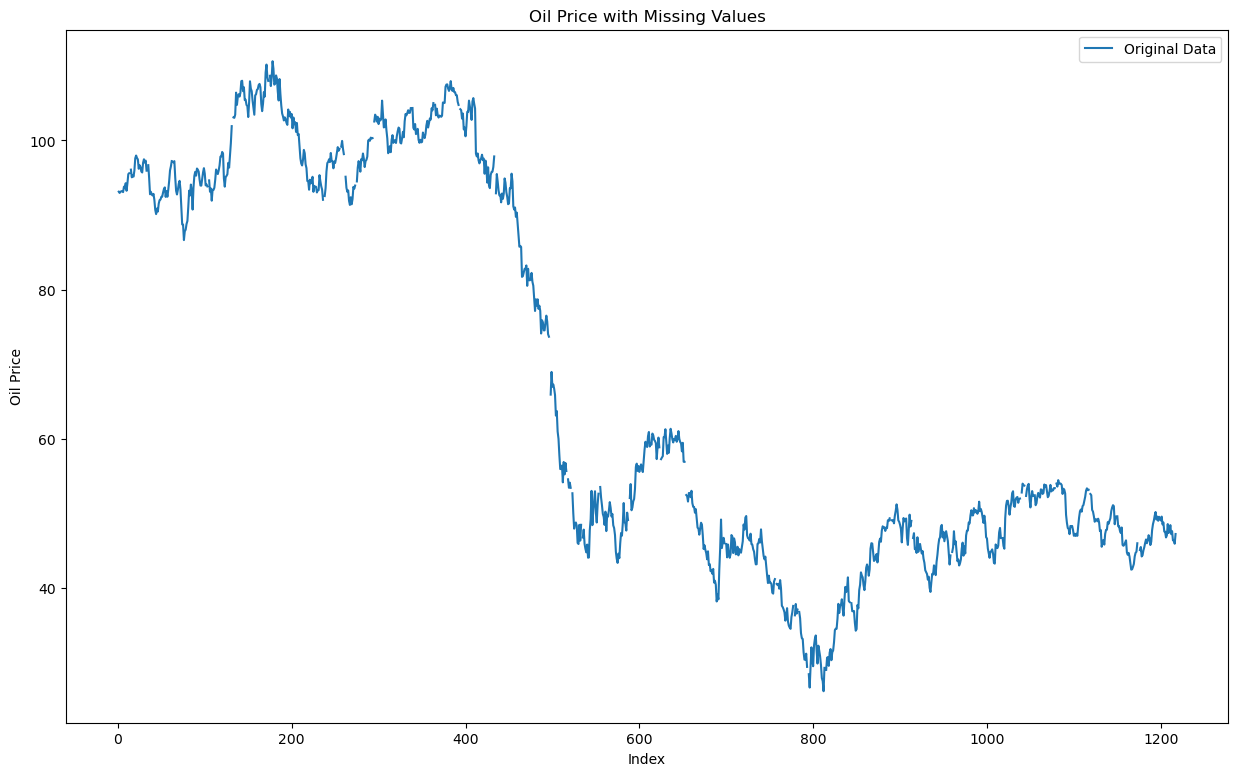

In [152]:
#Substituting missing values using interpolation

# Plot the data with missing values
plt.figure(figsize=(15,9))
plt.plot(oil.index, oil['dcoilwtico'], label='Original Data', linestyle='-')
plt.legend()
plt.title('Oil Price with Missing Values')
plt.xlabel('Index')
plt.ylabel('Oil Price')
plt.show()

In [153]:
oil.set_index('date', inplace=True)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [154]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='time')
print(oil.isnull().sum())

dcoilwtico    1
dtype: int64


In [155]:
oil.head(), oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1217 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


(            dcoilwtico
 date                  
 2013-01-01         NaN
 2013-01-02       93.14
 2013-01-03       92.97
 2013-01-04       93.12
 2013-01-07       93.20,
 None)

In [156]:
oil['dcoilwtico'].skew()

0.3246179716623851

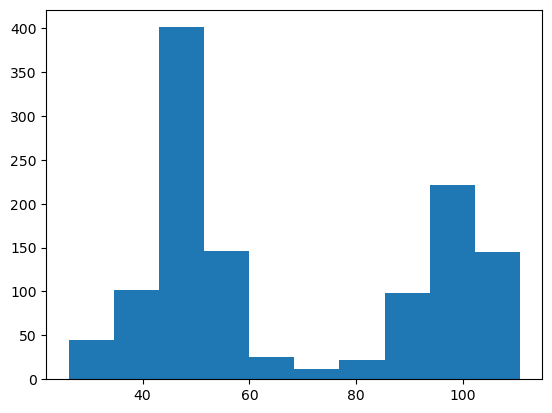

In [157]:
plt.hist(oil['dcoilwtico'])
plt.show()

In [158]:
#filling the one missing value with backwardfill as it is a bimodal distribution, so filling with mean or median will not do justice 
#and filling with the next value will ensure the prices follow the trend, using bfill as we have missing values at the beginning of the dataset
oil['dcoilwtico'].fillna(method='bfill', inplace=True) 
oil.head(), oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1218 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


(            dcoilwtico
 date                  
 2013-01-01       93.14
 2013-01-02       93.14
 2013-01-03       92.97
 2013-01-04       93.12
 2013-01-07       93.20,
 None)

In [159]:
# Merge datasets
train = pd.merge(train, stores, on='store_nbr', how='left')
train = pd.merge(train, oil, on='date', how='left')
train = pd.merge(train, holidays, on='date', how='left')

In [160]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [161]:
train.shape, train.columns , train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  type_y       object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 372.8+ MB


((3054348, 16),
 Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
        'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
        'locale_name', 'description', 'transferred'],
       dtype='object'),
 None)

In [162]:
train.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico      878526
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

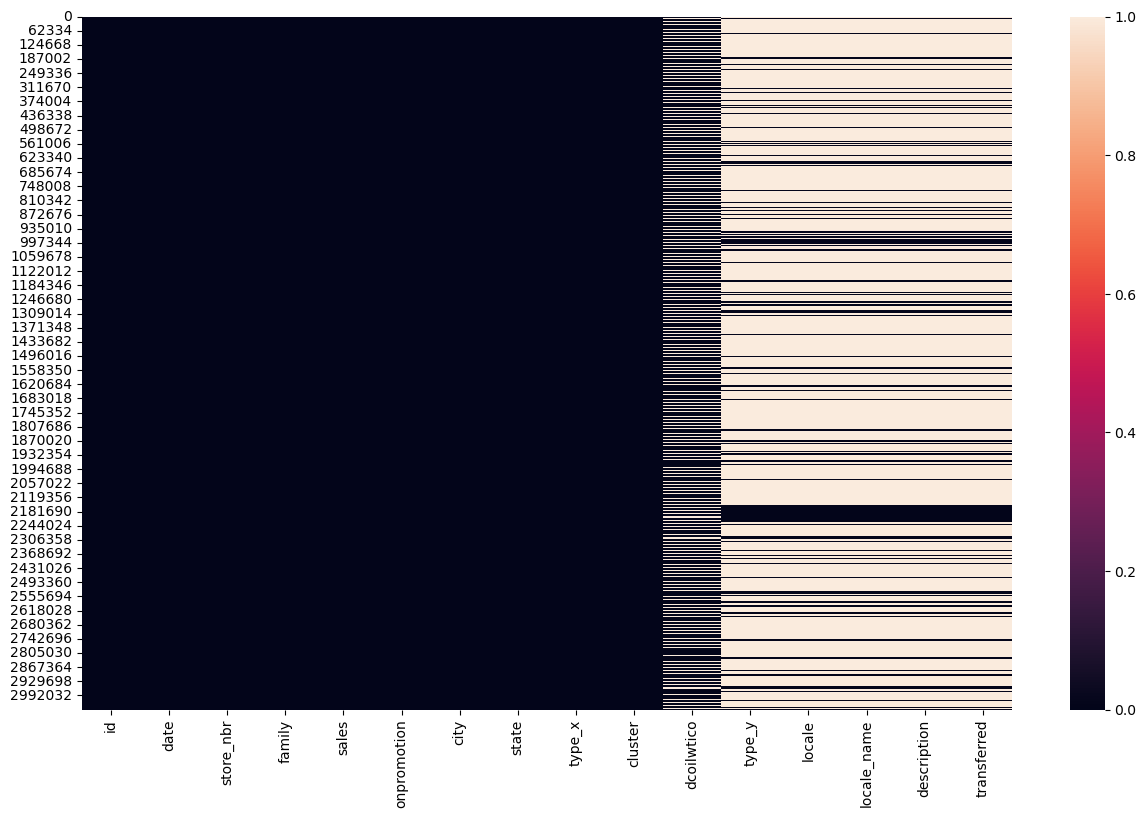

In [163]:
#Checking th distribution of missing values across the dataset
plt.figure(figsize=(15,9))
sns.heatmap(train.isnull())
plt.show()

In [164]:
#filling missing data using interpolation with time method
train.set_index('date', inplace=True)
train['dcoilwtico'] = train['dcoilwtico'].interpolate(method='time')
print(train.isnull().sum())

id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico           0
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64


In [165]:
train.columns

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred'],
      dtype='object')

In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   city         object 
 6   state        object 
 7   type_x       object 
 8   cluster      int64  
 9   dcoilwtico   float64
 10  type_y       object 
 11  locale       object 
 12  locale_name  object 
 13  description  object 
 14  transferred  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 372.8+ MB


In [167]:
cols=['family','city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'description', 'transferred']
for i in cols:
    print(f'Column: {i}')
    print(f'Number of unique values: {train[i].nunique()}')
    print(f'Unique values: {train[i].unique()}\n\n')

Column: family
Number of unique values: 33
Unique values: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


Column: city
Number of unique values: 22
Unique values: ['Quito' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra' 'Santo Domingo'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']


Column: state
Number of unique values: 16
Unique values: ['Pichincha' 'Cotopaxi' 'Chimborazo' 'Imbabura'
 'Santo Domingo de los Tsachilas' 'Bolivar' 'Pastaza' 'Tungurahua'
 'Guayas' 'Santa Ele

In [168]:
#Replacing NaN with 'Unknown' for categorical columns as there are a lot of missing values
cols=['type_y', 'locale', 'locale_name', 'description', 'transferred']
for i in cols:
    train[i].fillna('Unknown', inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   city         object 
 6   state        object 
 7   type_x       object 
 8   cluster      int64  
 9   dcoilwtico   float64
 10  type_y       object 
 11  locale       object 
 12  locale_name  object 
 13  description  object 
 14  transferred  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 372.8+ MB


In [169]:
train.isnull().sum()

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [170]:
train['type_y'].unique()

array(['Holiday', 'Unknown', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

### Feature Engineering 

In [171]:
# Time-based Features : to understand seasonality and periodicity in sales data.
train['date'] = train.index
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek
train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1


In [173]:
# Event-based Features: Holidays and weekends usually impact sales. 
# Government paydays (mid-month and month-end) can increase sales.

#The earthquake on April 16, 2016, may have affected sales trends.
train['is_holiday'] = train['type_y'].eq('Holiday')
train['is_weekend'] = (train['day_of_week'] >= 5).astype(int)
train['is_gov_payday'] = train.apply(
    lambda row: int(row['day'] in [15, row['date'].days_in_month]), axis=1
)
train['earthquake_impact'] = (train['date'] == '2016-04-16').astype(int)
train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week,is_holiday,is_weekend,is_gov_payday,earthquake_impact
date,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0


In [174]:
train['is_promotion'] = (train['onpromotion'] > 0).astype(int)
train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week,is_holiday,is_weekend,is_gov_payday,earthquake_impact,is_promotion
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0


In [175]:
train['onpromotion'].unique(), train['onpromotion'].nunique()

(array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
          7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
         37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
         14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
         23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
        113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
        105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
        140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
        125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
        151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
        162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
        177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
        196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
        185, 139, 143,  80, 124,  71, 134, 193,  78

In [176]:
train['is_promotion'].unique(), train['is_promotion'].nunique()

(array([0, 1]), 2)

In [177]:
# Rolling Statistics & Lag
# Lag and rolling features help detect trends and seasonality, which are important for time-series forecasting.

#Moving Averages and Rolling Standard Deviations for past sales

# 7-day moving average and rolling standard deviation
train['sales_ma_7'] = train['sales'].rolling(window=7, min_periods=1).mean()
train['sales_std_7'] = train['sales'].rolling(window=7, min_periods=1).std()

# 30-day moving average and rolling standard deviation
train['sales_ma_30'] = train['sales'].rolling(window=30, min_periods=1).mean()
train['sales_std_30'] = train['sales'].rolling(window=30, min_periods=1).std()

train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week,is_holiday,is_weekend,is_gov_payday,earthquake_impact,is_promotion,sales_ma_7,sales_std_7,sales_ma_30,sales_std_30
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,NaN,0.0,NaN
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0


In [178]:
# Include lagged features (e.g., sales from the previous week, previous month).

# Sales from the previous day
train['sales_lag_1'] = train['sales'].shift(1)

# Sales from the same day last week
train['sales_lag_7'] = train['sales'].shift(7)

# Sales from the same day last month (assuming ~30 days in a month)
train['sales_lag_30'] = train['sales'].shift(30)

train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week,is_holiday,is_weekend,is_gov_payday,earthquake_impact,is_promotion,sales_ma_7,sales_std_7,sales_ma_30,sales_std_30,sales_lag_1,sales_lag_7,sales_lag_30
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [179]:
#Calculating rolling statistics created some null values so, filling it with the next available values
train.fillna(method='bfill', inplace=True)
train.isnull().sum()

id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico           0
type_y               0
locale               0
locale_name          0
description          0
transferred          0
date                 0
day                  0
week                 0
month                0
year                 0
day_of_week          0
is_holiday           0
is_weekend           0
is_gov_payday        0
earthquake_impact    0
is_promotion         0
sales_ma_7           0
sales_std_7          0
sales_ma_30          0
sales_std_30         0
sales_lag_1          0
sales_lag_7          0
sales_lag_30         0
dtype: int64

In [180]:
train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week,is_holiday,is_weekend,is_gov_payday,earthquake_impact,is_promotion,sales_ma_7,sales_std_7,sales_ma_30,sales_std_30,sales_lag_1,sales_lag_7,sales_lag_30
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# Store-Specific Aggregations: unravel baseline sales for different stores.
store_avg_sales = train.groupby('store_nbr')['sales'].mean().rename('avg_store_sales')
train = train.merge(store_avg_sales, on='store_nbr', how='left')
train.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,date,day,week,month,year,day_of_week,is_holiday,is_weekend,is_gov_payday,earthquake_impact,is_promotion,sales_ma_7,sales_std_7,sales_ma_30,sales_std_30,sales_lag_1,sales_lag_7,sales_lag_30,avg_store_sales
0,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.651925
1,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.651925
2,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.651925
3,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.651925
4,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013-01-01,1,1,1,2013,1,True,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.651925


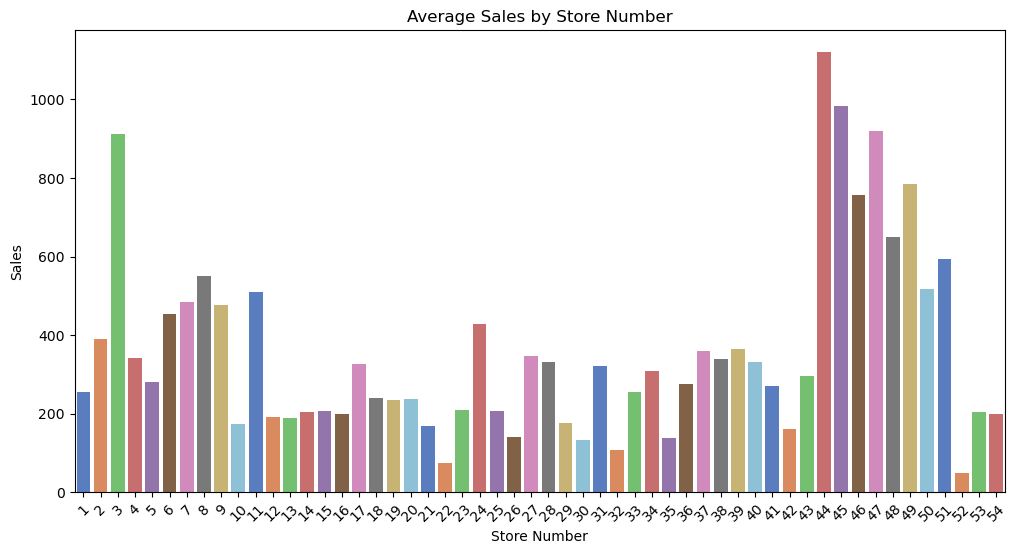

In [183]:
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='avg_store_sales', palette='muted', data=train)
plt.title("Average Sales by Store Number")
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### Store 44 has the highest average sales.

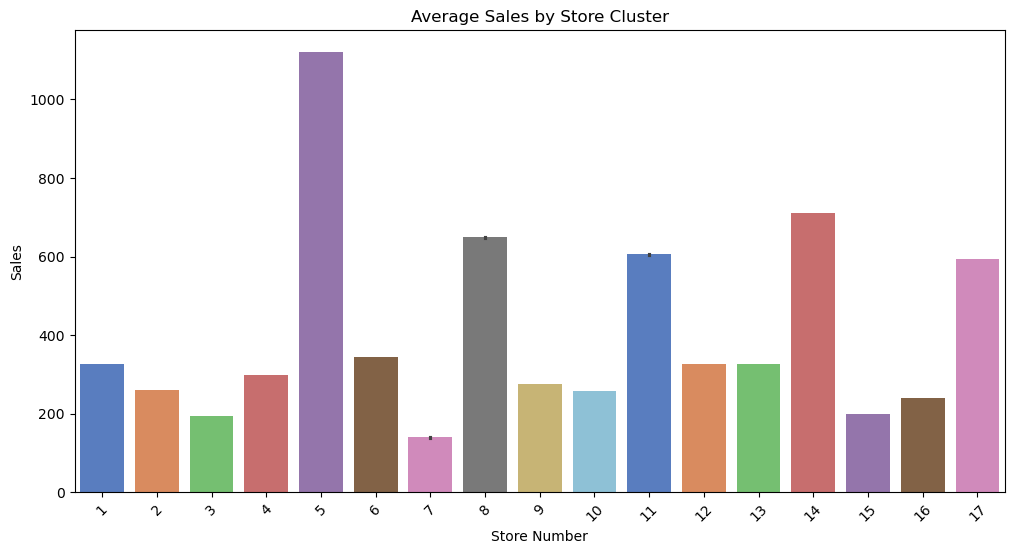

In [184]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='avg_store_sales', palette='muted', data=train)
plt.title("Average Sales by Store Cluster")
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### Store cluster 5 has the highest average sales.

In [185]:
# Top-selling product families per cluster.

top_families = train.groupby(['cluster', 'family'])['sales'].sum().reset_index()
top_families = top_families.sort_values(['cluster', 'sales'], ascending=[True, False])
top_selling_per_cluster = top_families.groupby('cluster').first().reset_index()
top_selling_per_cluster

,cluster,family,sales
0,1,GROCERY I,1.483284e+07
1,2,GROCERY I,8.649030e+06
2,3,GROCERY I,2.978610e+07
3,4,GROCERY I,1.682519e+07
4,5,GROCERY I,1.671595e+07
5,6,GROCERY I,4.397177e+07
6,7,GROCERY I,6.163853e+06
7,8,GROCERY I,2.768491e+07
8,9,GROCERY I,9.159591e+06
9,10,GROCERY I,3.021405e+07


In [186]:
top_3_families = top_families.groupby('cluster').head(3)
print(top_3_families)

     cluster     family         sales
12         1  GROCERY I  1.483284e+07
3          1  BEVERAGES  1.201252e+07
30         1    PRODUCE  8.221406e+06
45         2  GROCERY I  8.649030e+06
36         2  BEVERAGES  5.503139e+06
63         2    PRODUCE  5.068959e+06
78         3  GROCERY I  2.978610e+07
69         3  BEVERAGES  1.495938e+07
73         3   CLEANING  1.010321e+07
111        4  GROCERY I  1.682519e+07
102        4  BEVERAGES  8.343193e+06
129        4    PRODUCE  6.143160e+06
144        5  GROCERY I  1.671595e+07
135        5  BEVERAGES  1.369617e+07
162        5    PRODUCE  1.089640e+07
177        6  GROCERY I  4.397177e+07
168        6  BEVERAGES  2.362880e+07
172        6   CLEANING  1.227164e+07
210        7  GROCERY I  6.163853e+06
201        7  BEVERAGES  2.536783e+06
205        7   CLEANING  2.295478e+06
243        8  GROCERY I  2.768491e+07
234        8  BEVERAGES  2.376374e+07
261        8    PRODUCE  1.975672e+07
276        9  GROCERY I  9.159591e+06
267        9

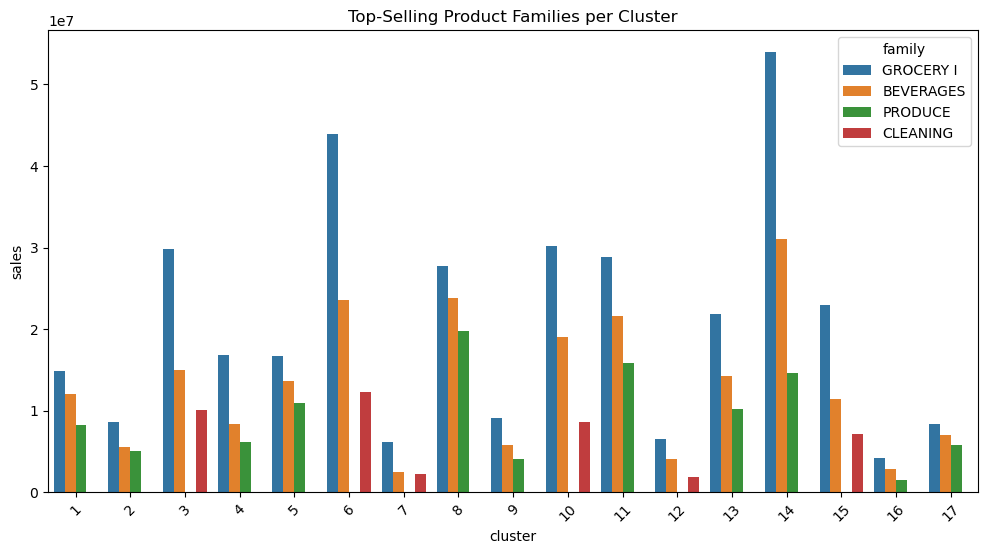

In [187]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='sales', hue='family', data=top_3_families)
plt.title("Top-Selling Product Families per Cluster")
plt.xticks(rotation=45)
plt.show()

#### Top selling families are Groceries, Beverages, Produce and Cleaning.

### EDA

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 34 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   store_nbr          int64         
 2   family             object        
 3   sales              float64       
 4   onpromotion        int64         
 5   city               object        
 6   state              object        
 7   type_x             object        
 8   cluster            int64         
 9   dcoilwtico         float64       
 10  type_y             object        
 11  locale             object        
 12  locale_name        object        
 13  description        object        
 14  transferred        object        
 15  date               datetime64[ns]
 16  day                int32         
 17  week               UInt32        
 18  month              int32         
 19  year               int32         
 20  day_of_week        int32

In [189]:
train.columns

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred', 'date', 'day', 'week', 'month', 'year',
       'day_of_week', 'is_holiday', 'is_weekend', 'is_gov_payday',
       'earthquake_impact', 'is_promotion', 'sales_ma_7', 'sales_std_7',
       'sales_ma_30', 'sales_std_30', 'sales_lag_1', 'sales_lag_7',
       'sales_lag_30', 'avg_store_sales'],
      dtype='object')

In [190]:
cols=['id','store_nbr','day', 'week', 'month', 'year',
       'day_of_week', 'is_holiday', 'is_weekend', 'is_gov_payday',
       'earthquake_impact', 'is_promotion',  'cluster']

for i in cols:
    train[i] = train[i].astype('object')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 34 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   store_nbr          object        
 2   family             object        
 3   sales              float64       
 4   onpromotion        int64         
 5   city               object        
 6   state              object        
 7   type_x             object        
 8   cluster            object        
 9   dcoilwtico         float64       
 10  type_y             object        
 11  locale             object        
 12  locale_name        object        
 13  description        object        
 14  transferred        object        
 15  date               datetime64[ns]
 16  day                object        
 17  week               object        
 18  month              object        
 19  year               object        
 20  day_of_week        objec

In [191]:
train.describe()

,sales,onpromotion,dcoilwtico,date,sales_ma_7,sales_std_7,sales_ma_30,sales_std_30,sales_lag_1,sales_lag_7,sales_lag_30,avg_store_sales
count,3.054348e+06,3.054348e+06,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06
mean,3.590209e+02,2.617480e+00,6.782500e+01,2015-04-26 12:11:45.717619200,3.590203e+02,6.493365e+02,3.590188e+02,8.567689e+02,3.590209e+02,3.590199e+02,3.590148e+02,3.590209e+02
min,0.000000e+00,0.000000e+00,2.619000e+01,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.888388e+01
25%,0.000000e+00,0.000000e+00,4.636667e+01,2014-03-01 00:00:00,5.100000e+01,8.432101e+01,1.777227e+02,4.464473e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.999817e+02
50%,1.100000e+01,0.000000e+00,5.329167e+01,2015-04-28 12:00:00,1.958571e+02,3.116592e+02,2.876485e+02,6.989258e+02,1.100000e+01,1.100000e+01,1.100000e+01,2.884129e+02
75%,1.960110e+02,0.000000e+00,9.573000e+01,2016-06-22 00:00:00,5.030000e+02,9.207710e+02,4.562730e+02,1.085453e+03,1.960110e+02,1.960092e+02,1.960000e+02,4.547362e+02
max,1.247170e+05,7.410000e+02,1.106200e+02,2017-08-15 00:00:00,2.509815e+04,4.712539e+04,7.663658e+03,2.272952e+04,1.247170e+05,1.247170e+05,1.247170e+05,1.120118e+03
std,1.107286e+03,1.225494e+01,2.568059e+01,NaN,4.629399e+02,8.710671e+02,2.902265e+02,6.687052e+02,1.107286e+03,1.107285e+03,1.107278e+03,2.377118e+02


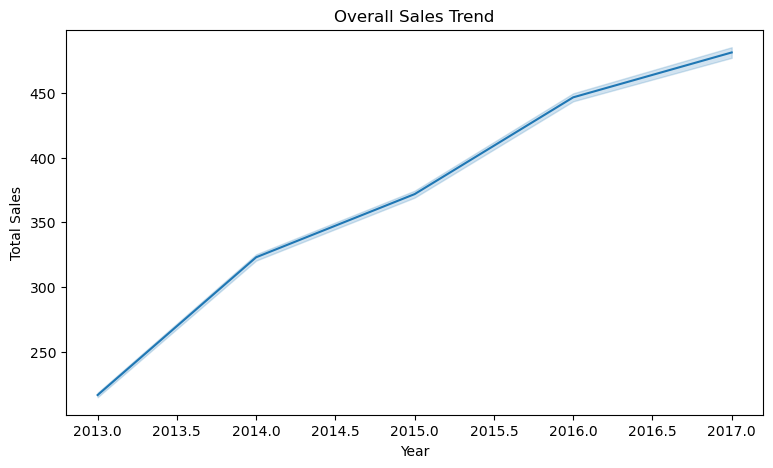

In [192]:
#Yearly Sales Trend
plt.figure(figsize=(9, 5))
sns.lineplot(x='year', y='sales', palette= "muted", data=train)
plt.title('Overall Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

### Overall Sales Trend
1. Sales have shown a steady upward trend from 2013 to 2017.
2. This indicates consistent business growth over the years.
3. There are no sudden drops, suggesting stable demand and possibly effective business strategies.

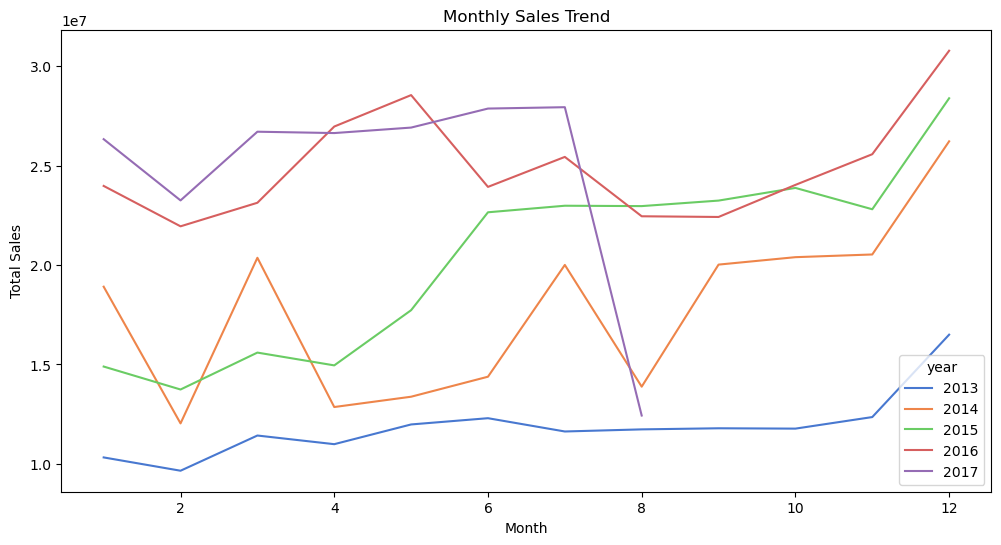

In [193]:
# Monthly Sales Trend

monthly_sales = train.groupby(['year', 'month'])['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales', hue='year', palette='muted', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

### Monthly Sales Trend
1. Sales vary significantly across different months.
2. Each year follows a similar seasonal pattern, with some months experiencing noticeable peaks (December) and drops (August).
3. The year 2016 and 2017 appear to have the highest sales overall, showing an improving sales trend.
4. The variation between years suggests seasonality effects, promotional campaigns, or external factors impacting sales.
5. The Sales for April 2016 seem to increase compared to the previous months, unlike in other years; this could be because of trying to replace damaged items during the Earthquake.

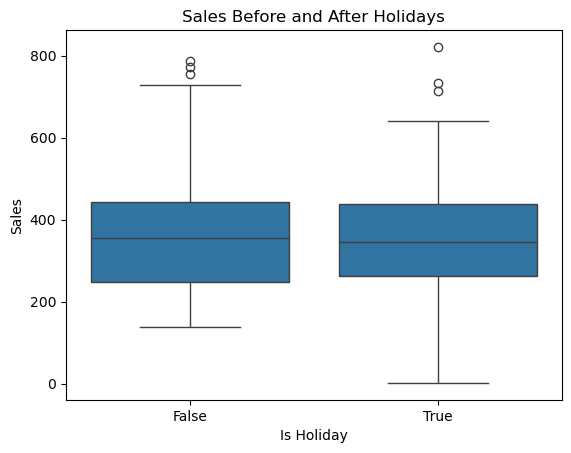

In [194]:
# Effect of Holiday on Sales
holiday_sales = train.groupby(['date', 'is_holiday'])['sales'].mean().reset_index()
sns.boxplot(x='is_holiday', y='sales', data=holiday_sales)
plt.title('Sales Before and After Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

### Sales Before and After Holidays 
1. Sales distribution is similar on holidays and non-holidays: holidays do not significantly boost sales.
2. Some higher outliers in holiday sales suggest occasional spikes but no consistent trend.

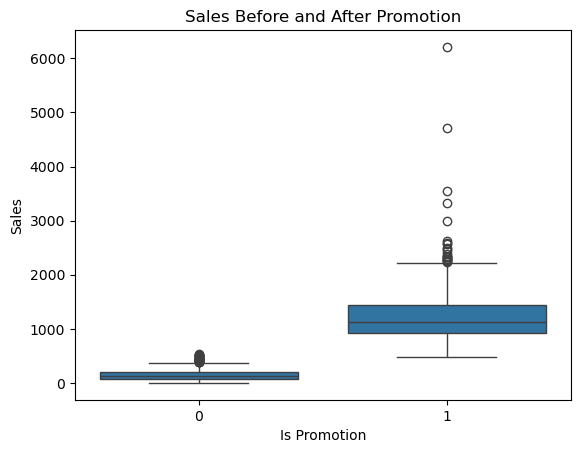

In [195]:
# Effect of Promotion on Sales
promotion_sales = train.groupby(['date', 'is_promotion'])['sales'].mean().reset_index()
sns.boxplot(x='is_promotion', y='sales', data=promotion_sales)
plt.title('Sales Before and After Promotion')
plt.xlabel('Is Promotion')
plt.ylabel('Sales')
plt.show()

### Sales Before and After Holidays 
Promotions are highly effective at driving sales volume: with promotions there's a substantial increase in median sales to around 1,000-1,500 units

Correlation between Sales and Oil Prices:
              sales  dcoilwtico
sales       1.00000    -0.07557
dcoilwtico -0.07557     1.00000


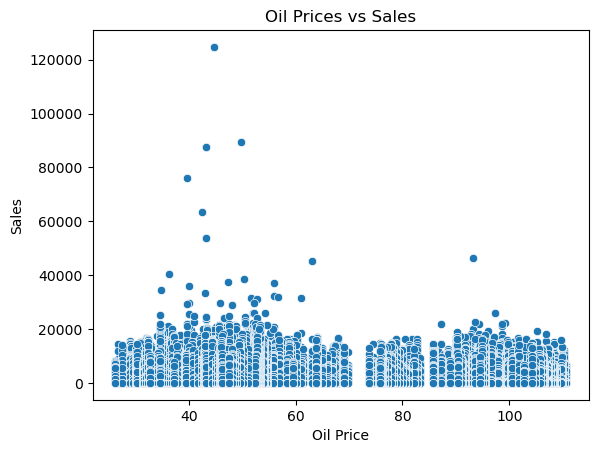

In [196]:
# Correlations Between Oil Prices & Sales
correlation = train[['sales', 'dcoilwtico']].corr()
print("Correlation between Sales and Oil Prices:")
print(correlation)
sns.scatterplot(x='dcoilwtico', y='sales', data=train)
plt.title('Oil Prices vs Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

### Correlation between Oil Price and Sales
Oil prices may not be a major direct driver of sales performance: there's no clear linear relationship between oil prices and sales.

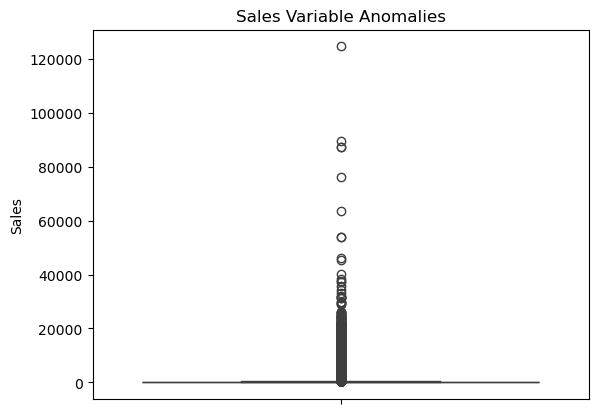

In [197]:
# Anomalies in Sales (Target) Variable
sns.boxplot(y='sales', data=train)
plt.title('Sales Variable Anomalies')
plt.ylabel('Sales')
plt.show()

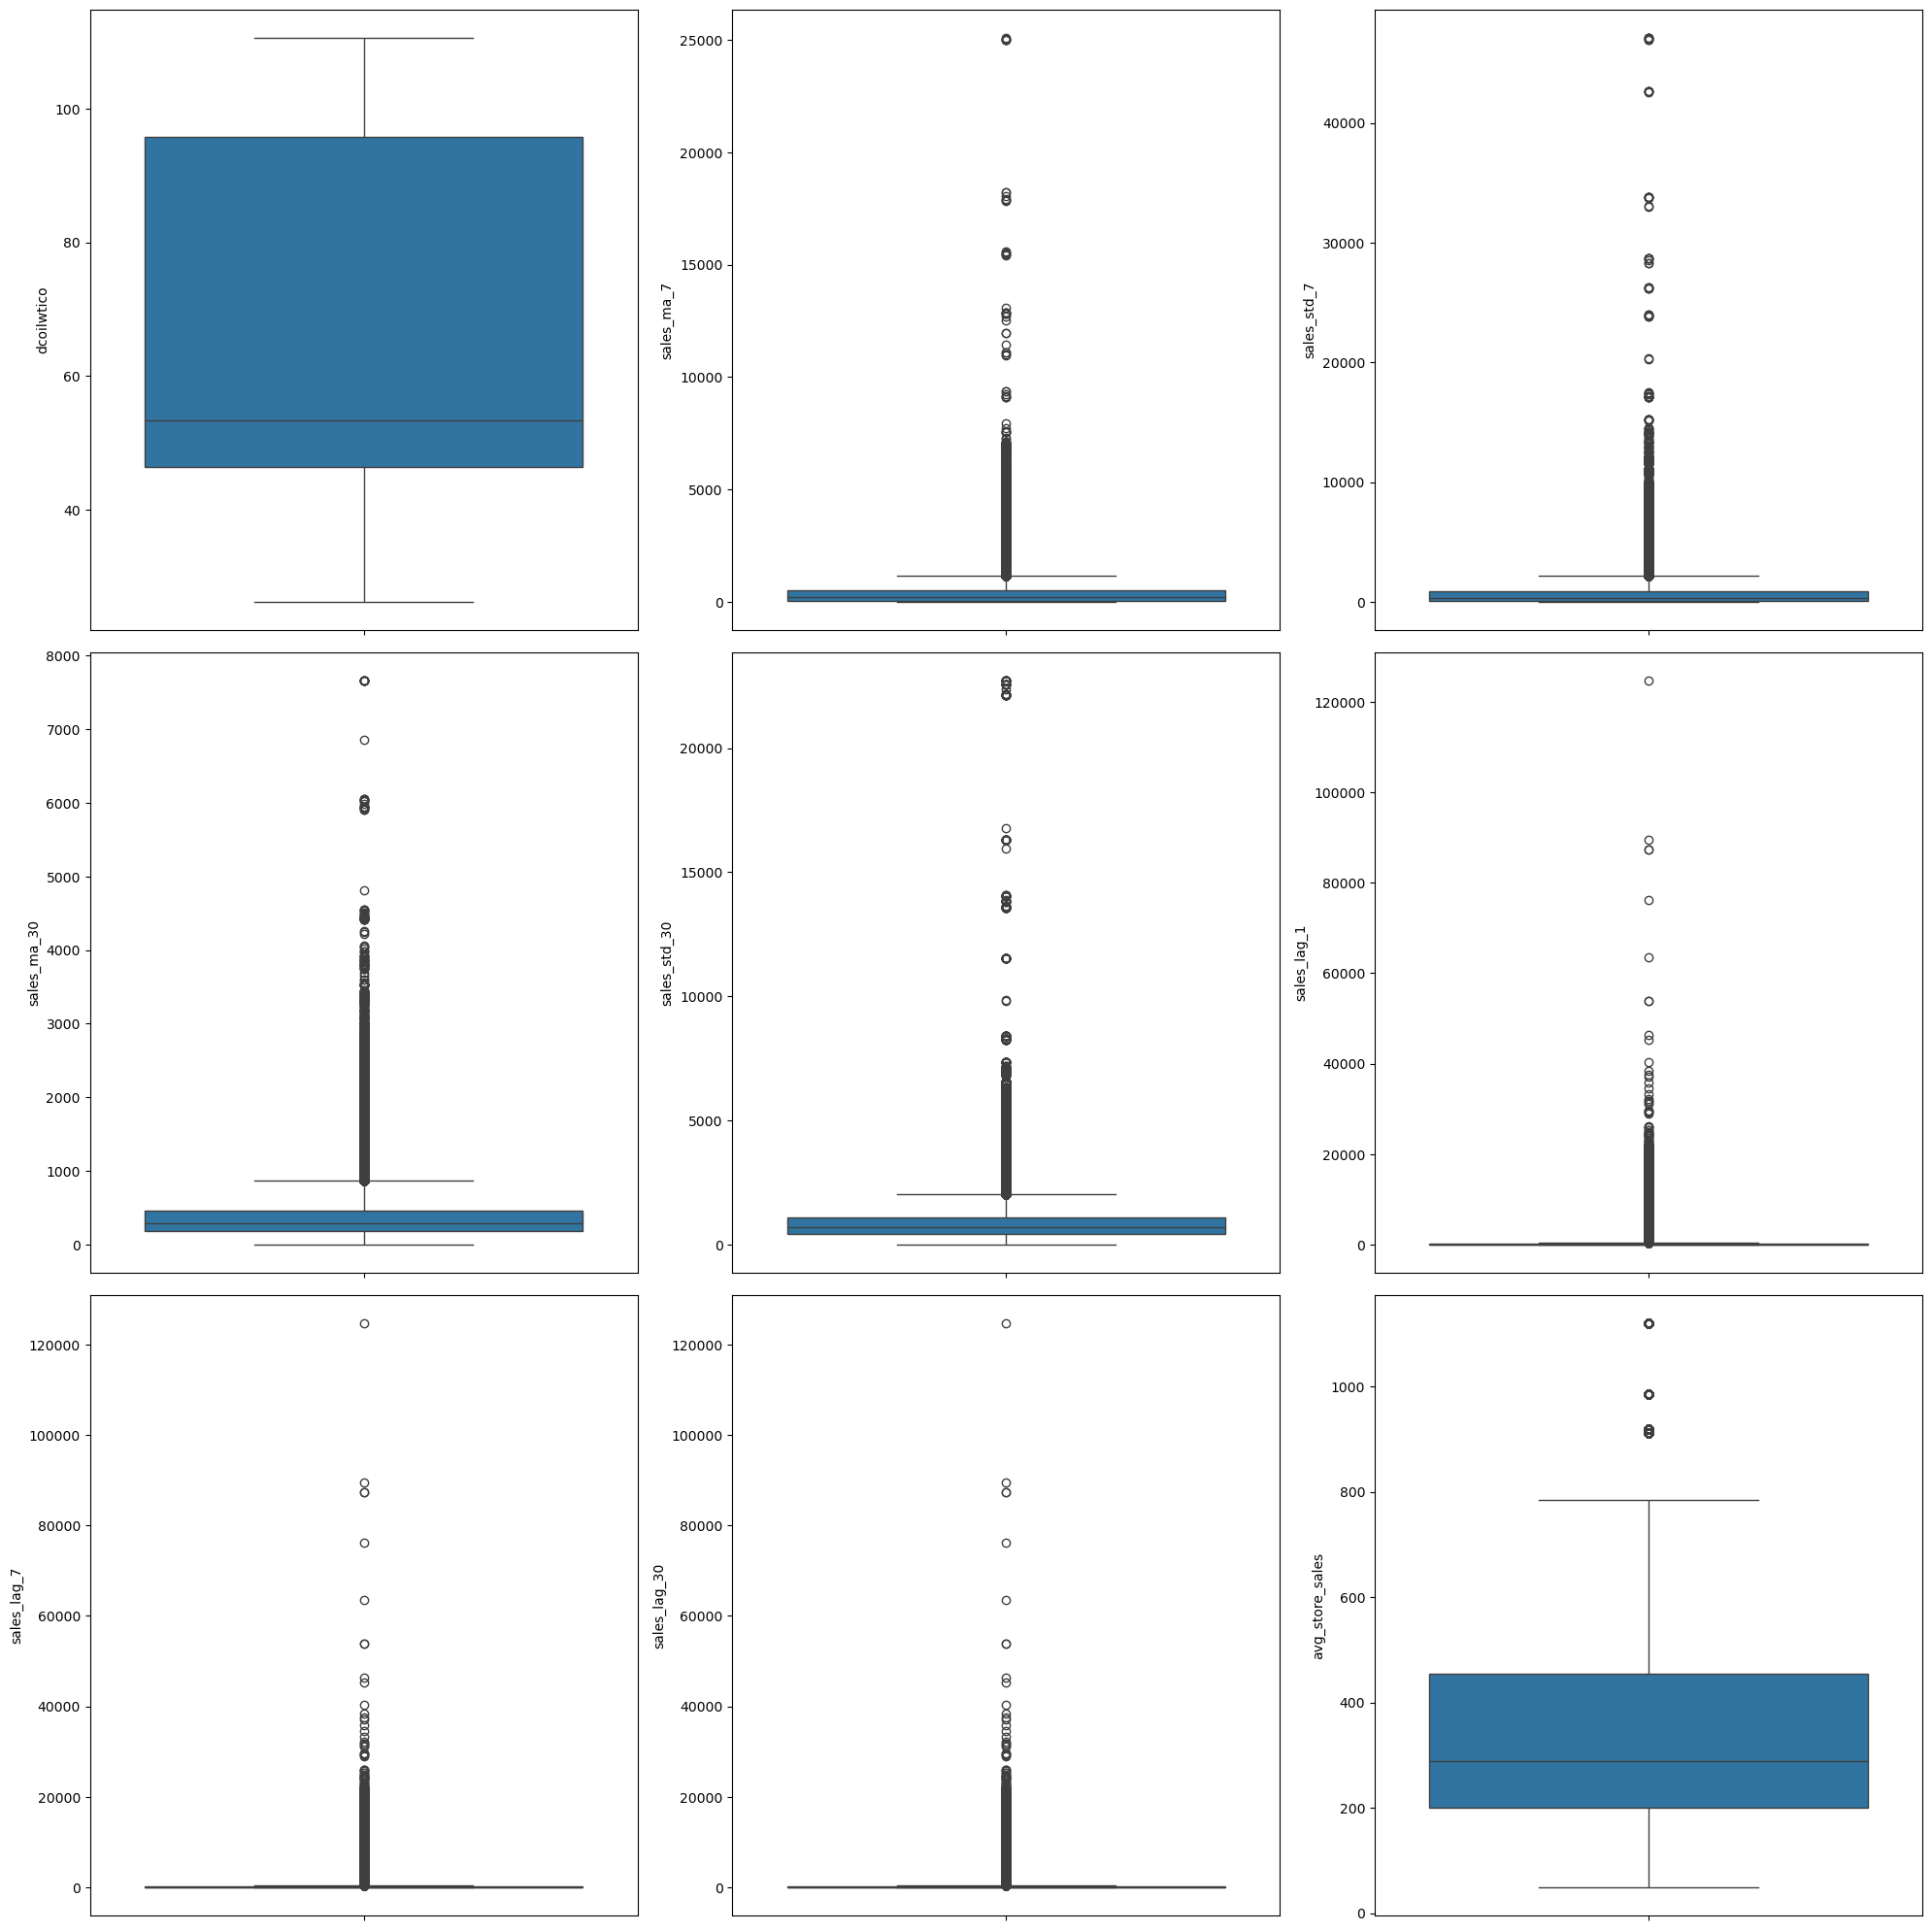

In [198]:
cols=[ 'dcoilwtico',  'sales_ma_7', 'sales_std_7',
       'sales_ma_30', 'sales_std_30', 'sales_lag_1', 'sales_lag_7',
       'sales_lag_30', 'avg_store_sales']
fig, axes = plt.subplots(3,3, figsize=(20, 20)) 
axes = axes.flatten()  # Flatten the 2D array of axes for easier access

# Plotting each column
for i in range(len(cols)):
    sns.boxplot(data=train, y=cols[i], ax=axes[i])

plt.tight_layout()
plt.show()

#### Anomalies
Columns with high outliers: 'sales_ma_7', 'sales_std_7','sales_ma_30', 'sales_std_30', 'sales_lag_1', 'sales_lag_7', 'sales_lag_30'

In [199]:
train.to_csv('processed_train.csv', index=False)
print("File created.")

File created.
